In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
%matplotlib inline

In [253]:
sns.set(style = 'white', context = 'notebook', palette = 'deep')
sns.set_style('white')
pd.set_option('display.max_columns',400)
pd.set_option('display.max_rows',1000)

In [119]:
# import data
train_master1 = pd.read_csv('./PPD-Second-Round-Data/first round train data/PPD_Training_Master_GBK_3_1_Training_Set.csv', encoding='gb18030')
train_master2 = pd.read_csv('./PPD-Second-Round-Data/second round newly added data/Kesci_Master_9w_gbk_3_2.csv', encoding='gb18030')
test_master = pd.read_csv('./PPD-Second-Round-Data/first round test data/Kesci_Master_9w_gbk_2.csv', encoding='gb18030')
train_master = pd.concat([train_master1,train_master2], axis=0).reset_index()
del train_master['index']

train_loginfo1 = pd.read_csv('./PPD-Second-Round-Data/first round train data/PPD_LogInfo_3_1_Training_Set.csv')
train_loginfo2 = pd.read_csv('./PPD-Second-Round-Data/second round newly added data/LogInfo_9w_3_2.csv')
test_loginfo = pd.read_csv('./PPD-Second-Round-Data/first round test data/LogInfo_9w_2.csv')
train_loginfo = pd.concat([train_loginfo1,train_loginfo2], axis=0).reset_index()
del train_loginfo['index']

train_user1 = pd.read_csv('./PPD-Second-Round-Data/first round train data/PPD_Userupdate_Info_3_1_Training_Set.csv')
train_user2 = pd.read_csv('./PPD-Second-Round-Data/second round newly added data/Userupdate_Info_9w_3_2.csv')
test_user = pd.read_csv('./PPD-Second-Round-Data/first round test data/Userupdate_Info_9w_2.csv')
train_user = pd.concat([train_user1,train_user2], axis=0).reset_index()
del train_user['index']

## Data quality analysis
- master

In [184]:
train_master.head(100)

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,WeblogInfo_8,WeblogInfo_9,WeblogInfo_10,WeblogInfo_11,WeblogInfo_12,WeblogInfo_13,WeblogInfo_14,WeblogInfo_15,WeblogInfo_16,WeblogInfo_17,WeblogInfo_18,UserInfo_5,UserInfo_6,UserInfo_7,UserInfo_8,UserInfo_9,UserInfo_10,UserInfo_11,UserInfo_12,UserInfo_13,UserInfo_14,UserInfo_15,UserInfo_16,UserInfo_17,UserInfo_18,UserInfo_19,UserInfo_20,UserInfo_21,UserInfo_22,UserInfo_23,UserInfo_24,Education_Info1,Education_Info2,Education_Info3,Education_Info4,Education_Info5,Education_Info6,Education_Info7,Education_Info8,WeblogInfo_19,WeblogInfo_20,WeblogInfo_21,WeblogInfo_23,WeblogInfo_24,WeblogInfo_25,WeblogInfo_26,WeblogInfo_27,WeblogInfo_28,WeblogInfo_29,WeblogInfo_30,WeblogInfo_31,WeblogInfo_32,WeblogInfo_33,WeblogInfo_34,WeblogInfo_35,WeblogInfo_36,WeblogInfo_37,WeblogInfo_38,WeblogInfo_39,WeblogInfo_40,WeblogInfo_41,WeblogInfo_42,WeblogInfo_43,WeblogInfo_44,WeblogInfo_45,WeblogInfo_46,WeblogInfo_47,WeblogInfo_48,WeblogInfo_49,WeblogInfo_50,WeblogInfo_51,WeblogInfo_52,WeblogInfo_53,WeblogInfo_54,WeblogInfo_55,WeblogInfo_56,WeblogInfo_57,WeblogInfo_58,ThirdParty_Info_Period1_1,ThirdParty_Info_Period1_2,ThirdParty_Info_Period1_3,ThirdParty_Info_Period1_4,ThirdParty_Info_Period1_5,ThirdParty_Info_Period1_6,ThirdParty_Info_Period1_7,ThirdParty_Info_Period1_8,ThirdParty_Info_Period1_9,ThirdParty_Info_Period1_10,ThirdParty_Info_Period1_11,ThirdParty_Info_Period1_12,ThirdParty_Info_Period1_13,ThirdParty_Info_Period1_14,ThirdParty_Info_Period1_15,ThirdParty_Info_Period1_16,ThirdParty_Info_Period1_17,ThirdParty_Info_Period2_1,ThirdParty_Info_Period2_2,ThirdParty_Info_Period2_3,ThirdParty_Info_Period2_4,ThirdParty_Info_Period2_5,ThirdParty_Info_Period2_6,ThirdParty_Info_Period2_7,ThirdParty_Info_Period2_8,ThirdParty_Info_Period2_9,ThirdParty_Info_Period2_10,ThirdParty_Info_Period2_11,ThirdParty_Info_Period2_12,ThirdParty_Info_Period2_13,ThirdParty_Info_Period2_14,ThirdParty_Info_Period2_15,ThirdParty_Info_Period2_16,ThirdParty_Info_Period2_17,ThirdParty_Info_Period3_1,ThirdParty_Info_Period3_2,ThirdParty_Info_Period3_3,ThirdParty_Info_Period3_4,ThirdParty_Info_Period3_5,ThirdParty_Info_Period3_6,ThirdParty_Info_Period3_7,ThirdParty_Info_Period3_8,ThirdParty_Info_Period3_9,ThirdParty_Info_Period3_10,ThirdParty_Info_Period3_11,ThirdParty_Info_Period3_12,ThirdParty_Info_Period3_13,ThirdParty_Info_Period3_14,ThirdParty_Info_Period3_15,ThirdParty_Info_Period3_16,ThirdParty_Info_Period3_17,ThirdParty_Info_Period4_1,ThirdParty_Info_Period4_2,ThirdParty_Info_Period4_3,ThirdParty_Info_Period4_4,ThirdParty_Info_Period4_5,ThirdParty_Info_Period4_6,ThirdParty_Info_Period4_7,ThirdParty_Info_Period4_8,ThirdParty_Info_Period4_9,ThirdParty_Info_Period4_10,ThirdParty_Info_Period4_11,ThirdParty_Info_Period4_12,ThirdParty_Info_Period4_13,ThirdParty_Info_Period4_14,ThirdParty_Info_Period4_15,ThirdParty_Info_Period4_16,ThirdParty_Info_Period4_17,ThirdParty_Info_Period5_1,ThirdParty_Info_Period5_2,ThirdParty_Info_Period5_3,ThirdParty_Info_Period5_4,ThirdParty_Info_Period5_5,ThirdParty_Info_Period5_6,ThirdParty_Info_Period5_7,ThirdParty_Info_Period5_8,ThirdParty_Info_Period5_9,ThirdParty_Info_Period5_10,ThirdParty_Info_Period5_11,ThirdParty_Info_Period5_12,ThirdParty_Info_Period5_13,ThirdParty_Info_Period5_14,ThirdParty_Info_Period5_15,ThirdParty_Info_Period5_16,ThirdParty_Info_Period5_17,ThirdParty_Info_Period6_1,ThirdParty_Info_Period6_2,ThirdParty_Info_Period6_3,ThirdParty_Info_Period6_4,ThirdParty_Info_Period6_5,ThirdParty_Info_Period6_6,ThirdParty_Info_Period6_7,ThirdParty_Info_Period6_8,ThirdParty_Info_Period6_9,ThirdParty_Info_Period6_10,ThirdParty_Info_Period6_11,ThirdParty_Info_Period6_12,ThirdParty_Info_Period6_13,ThirdParty_Info_Period6_14,ThirdParty_Info_Period6_15,ThirdParty_Info_Period6_16,ThirdParty_Info_Period6_17,ThirdParty_Info_Period7_1,ThirdParty_Info_Period7_2,ThirdParty_Info_Period7_3,ThirdParty_Info_Perio

In [194]:
train_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 228 entries, Idx to ListingInfo
dtypes: float64(38), int64(170), object(20)
memory usage: 104.4+ MB


In [195]:
train_master.describe()

,Idx,UserInfo_1,UserInfo_3,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,WeblogInfo_8,WeblogInfo_9,WeblogInfo_10,WeblogInfo_11,WeblogInfo_12,WeblogInfo_13,WeblogInfo_14,WeblogInfo_15,WeblogInfo_16,WeblogInfo_17,WeblogInfo_18,UserInfo_5,UserInfo_6,UserInfo_10,UserInfo_11,UserInfo_12,UserInfo_13,UserInfo_14,UserInfo_15,UserInfo_16,UserInfo_17,UserInfo_18,UserInfo_21,Education_Info1,Education_Info5,WeblogInfo_23,WeblogInfo_24,WeblogInfo_25,WeblogInfo_26,WeblogInfo_27,WeblogInfo_28,WeblogInfo_29,WeblogInfo_30,WeblogInfo_31,WeblogInfo_32,WeblogInfo_33,WeblogInfo_34,WeblogInfo_35,WeblogInfo_36,WeblogInfo_37,WeblogInfo_38,WeblogInfo_39,WeblogInfo_40,WeblogInfo_41,WeblogInfo_42,WeblogInfo_43,WeblogInfo_44,WeblogInfo_45,WeblogInfo_46,WeblogInfo_47,WeblogInfo_48,WeblogInfo_49,WeblogInfo_50,WeblogInfo_51,WeblogInfo_52,WeblogInfo_53,WeblogInfo_54,WeblogInfo_55,WeblogInfo_56,WeblogInfo_57,WeblogInfo_58,ThirdParty_Info_Period1_1,ThirdParty_Info_Period1_2,ThirdParty_Info_Period1_3,ThirdParty_Info_Period1_4,ThirdParty_Info_Period1_5,ThirdParty_Info_Period1_6,ThirdParty_Info_Period1_7,ThirdParty_Info_Period1_8,ThirdParty_Info_Period1_9,ThirdParty_Info_Period1_10,ThirdParty_Info_Period1_11,ThirdParty_Info_Period1_12,ThirdParty_Info_Period1_13,ThirdParty_Info_Period1_14,ThirdParty_Info_Period1_15,ThirdParty_Info_Period1_16,ThirdParty_Info_Period1_17,ThirdParty_Info_Period2_1,ThirdParty_Info_Period2_2,ThirdParty_Info_Period2_3,ThirdParty_Info_Period2_4,ThirdParty_Info_Period2_5,ThirdParty_Info_Period2_6,ThirdParty_Info_Period2_7,ThirdParty_Info_Period2_8,ThirdParty_Info_Period2_9,ThirdParty_Info_Period2_10,ThirdParty_Info_Period2_11,ThirdParty_Info_Period2_12,ThirdParty_Info_Period2_13,ThirdParty_Info_Period2_14,ThirdParty_Info_Period2_15,ThirdParty_Info_Period2_16,ThirdParty_Info_Period2_17,ThirdParty_Info_Period3_1,ThirdParty_Info_Period3_2,ThirdParty_Info_Period3_3,ThirdParty_Info_Period3_4,ThirdParty_Info_Period3_5,ThirdParty_Info_Period3_6,ThirdParty_Info_Period3_7,ThirdParty_Info_Period3_8,ThirdParty_Info_Period3_9,ThirdParty_Info_Period3_10,ThirdParty_Info_Period3_11,ThirdParty_Info_Period3_12,ThirdParty_Info_Period3_13,ThirdParty_Info_Period3_14,ThirdParty_Info_Period3_15,ThirdParty_Info_Period3_16,ThirdParty_Info_Period3_17,ThirdParty_Info_Period4_1,ThirdParty_Info_Period4_2,ThirdParty_Info_Period4_3,ThirdParty_Info_Period4_4,ThirdParty_Info_Period4_5,ThirdParty_Info_Period4_6,ThirdParty_Info_Period4_7,ThirdParty_Info_Period4_8,ThirdParty_Info_Period4_9,ThirdParty_Info_Period4_10,ThirdParty_Info_Period4_11,ThirdParty_Info_Period4_12,ThirdParty_Info_Period4_13,ThirdParty_Info_Period4_14,ThirdParty_Info_Period4_15,ThirdParty_Info_Period4_16,ThirdParty_Info_Period4_17,ThirdParty_Info_Period5_1,ThirdParty_Info_Period5_2,ThirdParty_Info_Period5_3,ThirdParty_Info_Period5_4,ThirdParty_Info_Period5_5,ThirdParty_Info_Period5_6,ThirdParty_Info_Period5_7,ThirdParty_Info_Period5_8,ThirdParty_Info_Period5_9,ThirdParty_Info_Period5_10,ThirdParty_Info_Period5_11,ThirdParty_Info_Period5_12,ThirdParty_Info_Period5_13,ThirdParty_Info_Period5_14,ThirdParty_Info_Period5_15,ThirdParty_Info_Period5_16,ThirdParty_Info_Period5_17,ThirdParty_Info_Period6_1,ThirdParty_Info_Period6_2,ThirdParty_Info_Period6_3,ThirdParty_Info_Period6_4,ThirdParty_Info_Period6_5,ThirdParty_Info_Period6_6,ThirdParty_Info_Period6_7,ThirdParty_Info_Period6_8,ThirdParty_Info_Period6_9,ThirdParty_Info_Period6_10,ThirdParty_Info_Period6_11,ThirdParty_Info_Period6_12,ThirdParty_Info_Period6_13,ThirdParty_Info_Period6_14,ThirdParty_Info_Period6_15,ThirdParty_Info_Period6_16,ThirdParty_Info_Period6_17,ThirdParty_Info_Period7_1,ThirdParty_Info_Period7_2,ThirdParty_Info_Period7_3,ThirdParty_Info_Period7_4,ThirdParty_Info_Period7_5,ThirdParty_Info_Period7_6,ThirdParty_Info_Period7_7,ThirdParty_Info_Period7_8,ThirdParty_Info_Period7_9,ThirdParty_Info_Period7_10,ThirdParty_Info_Period7_11,ThirdParty_Info_Period7_12,ThirdParty_Info_Period7_13,ThirdParty

In [72]:
test_master.describe()

,Idx,UserInfo_1,UserInfo_3,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,...,SocialNetwork_9,SocialNetwork_10,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_15,SocialNetwork_16,SocialNetwork_17,target
count,19999.000000,19994.000000,19994.000000,654.000000,18853.000000,654.000000,18855.000000,18855.000000,18855.000000,19999.000000,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,45768.280414,3.216215,4.693608,2.007645,0.136477,1.129969,3.081146,1.860780,2.995015,10.650183,...,33.351568,69.885644,-0.980949,-0.744887,0.219361,0.061603,0.028001,0.017151,0.253713,0.076004
std,26495.953730,1.841983,1.319076,7.806520,0.364294,7.648474,3.739047,1.888557,3.636061,15.855317,...,122.914005,668.480583,2.609477,0.441067,0.420655,0.241684,0.164981,0.129837,0.437095,0.265011
min,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22410.500000,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45902.000000,3.000000,5.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2.000000,6.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68484.500000,5.000000,5.000000,1.000000,0.000000,1.000000,3.000000,2.000000,3.000000,13.000000,...,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,91704.000000,7.000000,7.000000,133.000000,3.000000,133.000000,138.000000,122.000000,138.000000,643.000000,...,2837.000000,72042.000000,368.000000,1.000000,4.000000,2.000000,1.000000,1.000000,2.000000,1.000000


In [109]:
# missing rate
master_missingrate = pd.DataFrame(train_master.isna().sum() / len(train_master),columns = ['ratio'])\
                     .sort_values(by = 'ratio',ascending=False)
master_missingrate.head(10)

,ratio
WeblogInfo_1,0.966967
WeblogInfo_3,0.966967
UserInfo_12,0.632667
UserInfo_13,0.632667
UserInfo_11,0.632667
WeblogInfo_20,0.267117
WeblogInfo_21,0.102233
WeblogInfo_19,0.098900
WeblogInfo_2,0.056067
WeblogInfo_4,0.055867


In [108]:
master_missingrate_test = pd.DataFrame(test_master.isna().sum() / len(test_master),columns = ['ratio'])\
                     .sort_values(by = 'ratio',ascending=False)

top10_test = master_missingrate_test.head(10)
top10_test

,ratio
WeblogInfo_1,0.967298
WeblogInfo_3,0.967298
UserInfo_11,0.634832
UserInfo_12,0.634832
UserInfo_13,0.634832
WeblogInfo_20,0.265213
WeblogInfo_21,0.099105
WeblogInfo_19,0.096505
WeblogInfo_2,0.057303
WeblogInfo_4,0.057203


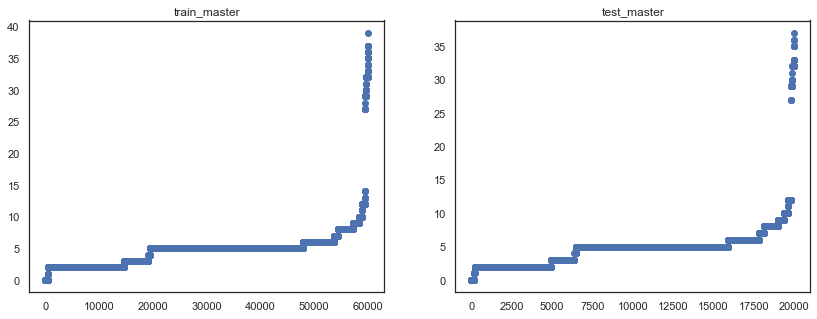

In [178]:
# 按行统计缺失值
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
train_master_row = pd.DataFrame(train_master.isna().sum(axis=1),columns=['missnum']).sort_values(by='missnum',ascending=True).reset_index()
del train_master_row['index']
plt.scatter(train_master_row.index,train_master_row['missnum'])
plt.title('train_master')

plt.subplot(1,2,2)
test_master_row = pd.DataFrame(test_master.isna().sum(axis=1),columns=['missnum']).sort_values(by='missnum',ascending=True).reset_index()
del test_master_row['index']
plt.scatter(test_master_row.index,test_master_row['missnum'])
plt.title('test_master');

Text(0.5, 1.0, 'test_master')

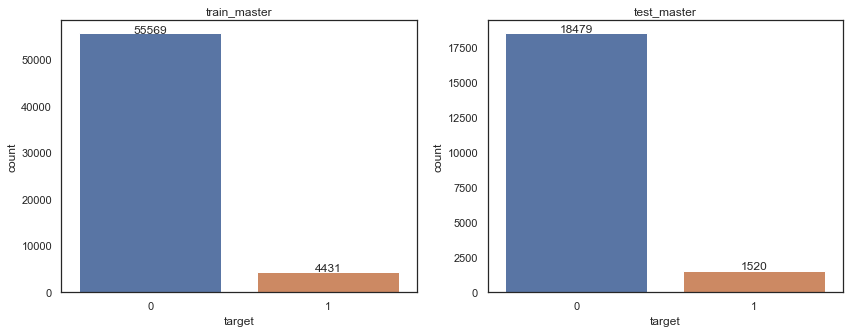

In [69]:
# Proportion of positive and negative samples
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
sns.countplot(data = train_master, x = 'target')

target_count = train_master['target'].value_counts()
for i in range(target_count.shape[0]):
    count = target_count[i]
    pct_string = '{}'.format(count)
    plt.text(i, count+100, pct_string, ha='center')
plt.title('train_master')
    

plt.subplot(1,2,2)
sns.countplot(data = test_master, x = 'target')

target_count = test_master['target'].value_counts()
for i in range(target_count.shape[0]):
    count = target_count[i]
    pct_string = '{}'.format(count)
    plt.text(i, count+100, pct_string, ha='center')
plt.title('test_master')

- Log_info

In [70]:
train_loginfo

,Idx,Listinginfo1,LogInfo1,LogInfo2,LogInfo3
0,10001,2014-03-05,107,6,2014-02-20
1,10001,2014-03-05,107,6,2014-02-23
2,10001,2014-03-05,107,6,2014-02-24
3,10001,2014-03-05,107,6,2014-02-25
4,10001,2014-03-05,107,6,2014-02-27
...,...,...,...,...,...
579986,9999,2014-02-23,-4,6,2014-02-21
579987,9999,2014-02-23,-4,6,2014-02-21
579988,9999,2014-02-23,-4,6,2014-02-21
579989,9999,2014-02-23,-4,6,2014-02-22


In [196]:
train_loginfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160542 entries, 0 to 1160541
Data columns (total 5 columns):
Idx             1160542 non-null int64
Listinginfo1    1160542 non-null object
LogInfo1        1160542 non-null int64
LogInfo2        1160542 non-null int64
LogInfo3        1160542 non-null object
dtypes: int64(3), object(2)
memory usage: 44.3+ MB


In [200]:
train_loginfo.isna().sum()

Idx             0
Listinginfo1    0
LogInfo1        0
LogInfo2        0
LogInfo3        0
dtype: int64

- Userupdate_Info

In [203]:
train_user['UserupdateInfo1'].value_counts()

_MobilePhone           56912
_ResidencePhone        56053
_ResidenceYears        55812
_ResidenceTypeId       55786
_EducationId           55518
_HasBuyCar             55285
_MarriageStatusId      54922
_QQ                    53474
_ResidenceAddress      52549
_LastUpdateDate        43505
_DistrictId            40502
_CityId                39942
_ProvinceId            39706
_RealName              19405
_IdNumber              13282
_Phone                  7291
_RelationshipId         4220
_mobilePhone            2893
_turnover               2708
_lastUpdateDate         2473
_CompanyPhone           2452
_regStepId              2027
_CompanyName            2024
_CompanyAddress         1752
_flag_UCtoBcp           1610
_flag_UCtoPVR           1388
_Age                    1209
_IsCash                 1116
_realName               1113
_residenceYears         1018
_residencePhone          987
_Department              978
_WorkYears               949
_residenceAddress        943
_residenceType

#### 质量问题

**master**:
>- WeblogInfo_1、WeblogInfo_3缺失率大于90%
- 正负样本比例失衡
- UserInfo_8 包含有“重庆”、 “重庆市”等取值，它们实际上是同一个城市，需要把 字符中的“市”全部去掉
- UserInfo_9字段的取值包含了空格字符，如“中国移动”和“中国移动 ”
- UserInfo_2、 UserInfo_4、 UserInfo_8、 UserInfo_20、UserInfo_7 和 UserInfo_19这几个地理位置字段存在不一致，比如‘恩施’和‘ 恩施土家族苗族自治州’，需要统一

**Userupdate_Info**:
>- UserupdateInfo1字段中存在大小写不一致的情况，如‘_MobilePhone’和‘_mobilePhone’
- UserupdateInfo1字段中'_mobilephone' 和 '_phone' 应该为一个类别，统一转换为‘_phone’

## data cleaning

In [308]:
city_dict = {
            '恩施':'恩施土家族苗族自治州',
            '广西':'广西壮族自治区',
            '红河':'红河哈尼族彝族自治州',
            '迪庆':'迪庆藏族自治州',
            '宁夏':'宁夏回族自治区',
            '凉山':'凉山彝族自治州',
            '内蒙古':'内蒙古自治区',
            '延边':'延边朝鲜族自治州',
            '黔东南':'黔东南苗族侗族自治州',
            '果洛':'果洛藏族自治州',
            '海南':'海南藏族自治州',
            '迪庆':'迪庆藏族自治州',
            '甘南':'甘南藏族自治州',
            '阿坝藏族羌族自治州-马尔康':'阿坝藏族羌族自治州',
            '甘孜':'甘孜藏族自治州',
            '海西':'海西蒙古族藏族自治州',
            '海西蒙古族藏族自治州-格尔木':'海西蒙古族藏族自治州',
            '临夏':'临夏回族自治州',
            '德宏':'德宏傣族景颇族自治州',
            '昌吉':'昌吉回族自治州',
            '西双版纳':'西双版纳傣族自治州',
            '巴音':'巴音郭楞蒙古自治州',
            '库尔勒':'巴音郭楞蒙古自治州',
            '文山':'文山壮族苗族自治州',
            '大理':'大理白族自治州',
            '楚雄':'楚雄彝族自治州',
            '伊犁':'伊犁哈萨克自治州',
            '巴彦淖尔':'巴彦淖尔盟',
            '乌兰察布':'乌兰察布盟',
            '黔西南布依族苗族自治州-兴义':'黔西南布依族苗族自治州',
            '延边朝鲜族自治州-延吉':'延边朝鲜族自治州',
            '黔南布依族苗族自治州-都匀':'黔西南布依族苗族自治州',
            '黔西南':'黔西南布依族苗族自治州',
            '犁哈萨克自治州-伊宁':'犁哈萨克自治州',
            '呼伦贝尔 海拉尔':'呼伦贝尔',
            '昌吉回族自治州-昌吉':'昌吉回族自治州',
            '湘西土家族苗族自治州-吉首':'湘西土家族苗族自治州',
            '伊犁哈萨克自治州-奎屯':'伊犁哈萨克自治州',
            '尔塔拉蒙古自治州-博州':'博尔塔拉蒙古自治州',
            '克州':'克孜勒苏柯尔克孜自治州',
            '犁哈萨克自治州':'伊犁哈萨克自治州',
            '襄樊':'襄阳'
}

In [288]:
test_m = test_master.copy()
train_m = train_master.copy()

test_L = test_loginfo.copy()
train_L = train_loginfo.copy()

test_U = test_user.copy()
train_U = train_user.copy()

# master数据集
# 删除WeblogInfo_1、WeblogInfo_3两个字段
train_m = train_m[train_m.columns.difference(['WeblogInfo_1','WeblogInfo_3'])]
test_m = test_m[test_m.columns.difference(['WeblogInfo_1','WeblogInfo_3'])]

# UserInfo_8、UserInfo_20中的“市”全部去掉
train_m['UserInfo_8'] = train_m['UserInfo_8'].astype('str').str.split('市',expand=True)[0]
train_m['UserInfo_8'] = train_m['UserInfo_8'].astype('object')
test_m['UserInfo_8'] = test_m['UserInfo_8'].astype('str').str.split('市',expand=True)[0]
test_m['UserInfo_8'] = test_m['UserInfo_8'].astype('object')
train_m['UserInfo_20'] = train_m['UserInfo_20'].str.split('市',expand=True)[0]
test_m['UserInfo_20'] = test_m['UserInfo_20'].str.split('市',expand=True)[0]
train_m['UserInfo_19'] = train_m['UserInfo_19'].str.split('省',expand=True)[0]
test_m['UserInfo_19'] = test_m['UserInfo_19'].str.split('省',expand=True)[0]
train_m['UserInfo_19'] = train_m['UserInfo_19'].str.split('市',expand=True)[0]
test_m['UserInfo_19'] = test_m['UserInfo_19'].str.split('市',expand=True)[0]
for col in ['UserInfo_2','UserInfo_4','UserInfo_8','UserInfo_20']:
    train_m[col] = train_m[col].str.split('地区',expand=True)[0]
    test_m[col] = test_m[col].str.split('地区',expand=True)[0]

cols = ['UserInfo_2','UserInfo_4','UserInfo_7','UserInfo_8','UserInfo_19','UserInfo_20']
for col in cols:
    for i,j in city_dict.items():
        train_m[col] = train_m[col].astype('str').replace(i,j).astype('object') 
        test_m[col] = test_m[col].astype('str').replace(i,j).astype('object')

# 去掉UserInfo_9字段中的空格字符
train_m['UserInfo_9'] = train_m['UserInfo_9'].astype('str')
train_m['UserInfo_9'] = train_m['UserInfo_9'].apply(lambda x: x.replace(' ',''))
train_m['UserInfo_9'] = train_m['UserInfo_9'].astype('object')
test_m['UserInfo_9'] = test_m['UserInfo_9'].astype('str')
test_m['UserInfo_9'] = test_m['UserInfo_9'].apply(lambda x: x.replace(' ',''))
test_m['UserInfo_9'] = test_m['UserInfo_9'].astype('object')


# Userupdate_Info数据集
# UserupdateInfo1字段统一换成小写
train_U['UserupdateInfo1'] = train_U['UserupdateInfo1'].str.lower()
test_U['UserupdateInfo1'] = test_U['UserupdateInfo1'].str.lower()

# UserupdateInfo1字段中'_mobilephone' 统一转换为‘_phone’
train_U['UserupdateInfo1'] = train_U['UserupdateInfo1'].astype('str').replace('_mobilephone','_phone')
test_U['UserupdateInfo1'] = test_U['UserupdateInfo1'].astype('str').replace('_mobilephone','_phone')
train_U['UserupdateInfo1'] = train_U['UserupdateInfo1'].astype('object')
test_U['UserupdateInfo1'] = test_U['UserupdateInfo1'].astype('object')

In [289]:
# 删除常变量
trainm_std = pd.DataFrame(train_m.describe().loc['std'],columns=['std']).sort_values(by='std',ascending=True)
constant_list = trainm_std[trainm_std['std'] < 0.06].index.tolist()
train_m = train_m[train_m.columns.difference(constant_list)]
test_m = test_m[train_m.columns]

In [310]:
test_m.to_csv('./data/Master_testset.csv',index=False)
train_m.to_csv('./data/Master_trainingset.csv',index=False)
test_L.to_csv('./data/Loginfo_testset.csv',index=False)
train_L.to_csv('./data/Loginfo_trainingset.csv',index=False)
test_U.to_csv('./data/Userinfo_testset.csv',index=False)
train_U.to_csv('./data/Userinfo_trainingset.csv',index=False)